In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import KBinsDiscretizer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('whitegrid')

path = "../../dane/8CPU_20RAM/3600s/2repl/merged.csv"

### Wczytanie danych

In [2]:
data = pd.read_csv(path)
data = data.drop('replicaId', axis=1)
data = data.drop(["applicationTime_methods", "databaseTime_methods", "databaseTime_trading", 
                  "applicationTime_trading", "timestamp"], axis=1)

print('Data shape:', data.shape)

Data shape: (536504, 10)


### Normalizacja danych

In [3]:
endpoint_map = {
    'do-register': 0,
    'add-sell-offer': 1,
    'add-buy-offer': 2,
    'get-stock-data': 3,
    'add-company': 4,
    'get-stock-users-and-companies': 5
}
data['endpointUrl_methods'] = data['endpointUrl_methods'].replace(endpoint_map)

data['cpuUsage_stock'] = round(data['cpuUsage_stock'], 2)
data['memoryUsage_stock'] = round(data['memoryUsage_stock'], 2)
data['cpuUsage_traffic'] = round(data['cpuUsage_traffic'], 2)
data['memoryUsage_traffic'] = round(data['memoryUsage_traffic'], 2)

### Obliczenie anomalii

In [4]:
clf = IsolationForest(random_state=0, n_jobs=-1)
clf.fit(data);
pred = clf.predict(data)
print('Percentage of anomalies in data: %.3f' %np.mean(pred==-1))

Percentage of anomalies in data: 0.353


### Stworzenie wykresu

<Figure size 640x480 with 0 Axes>

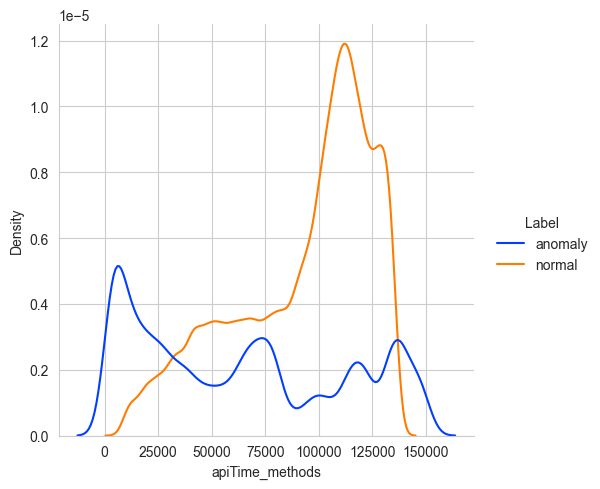

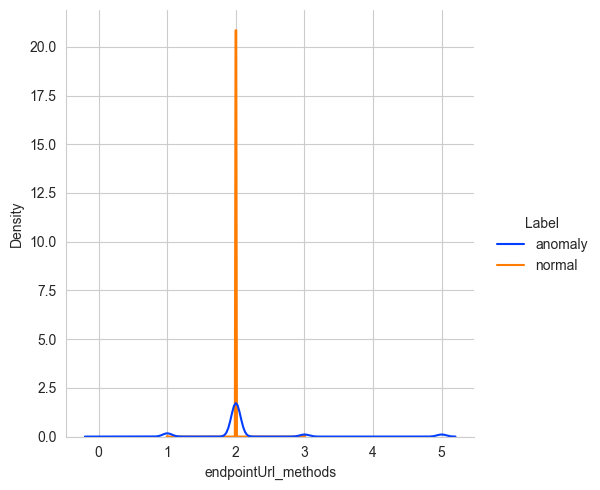

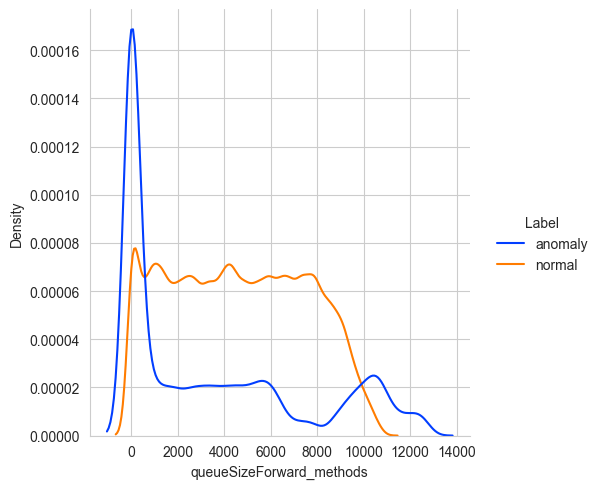

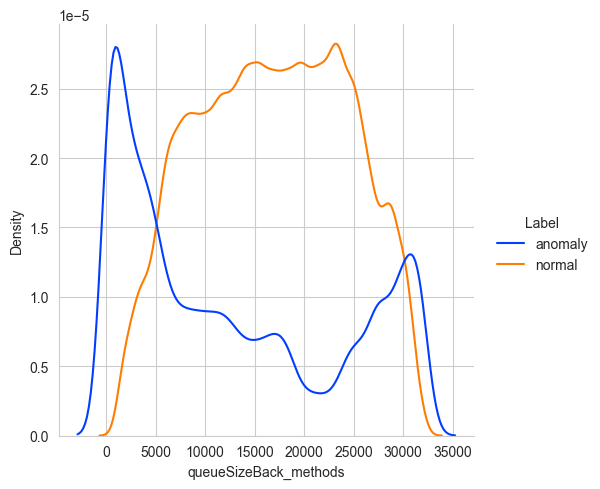

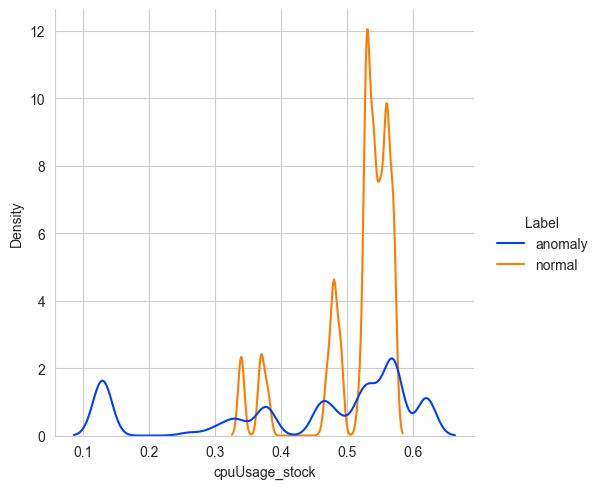

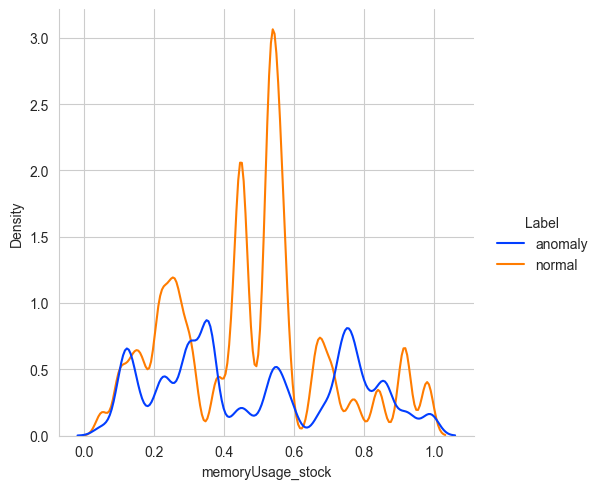

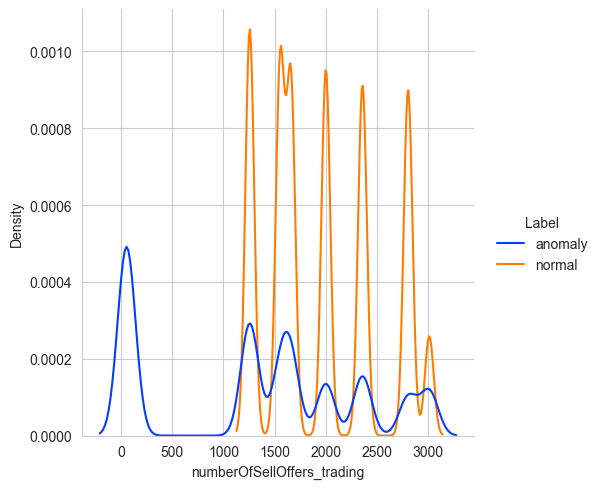

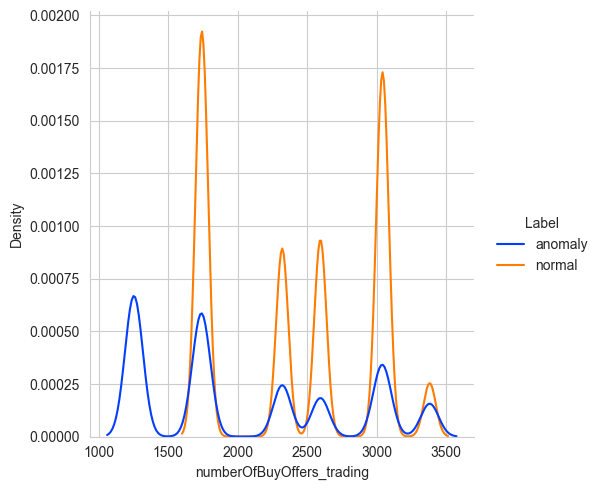

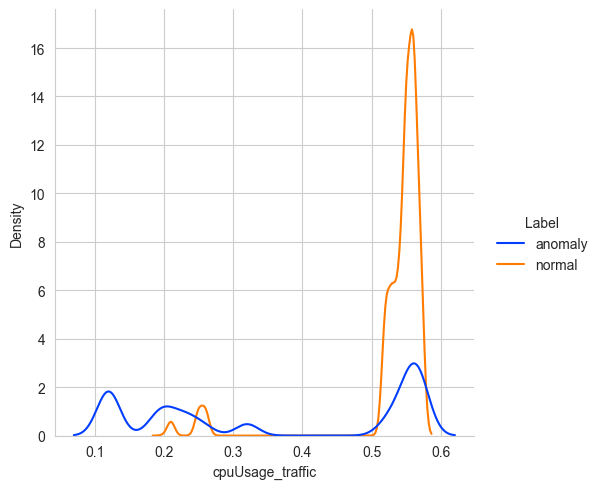

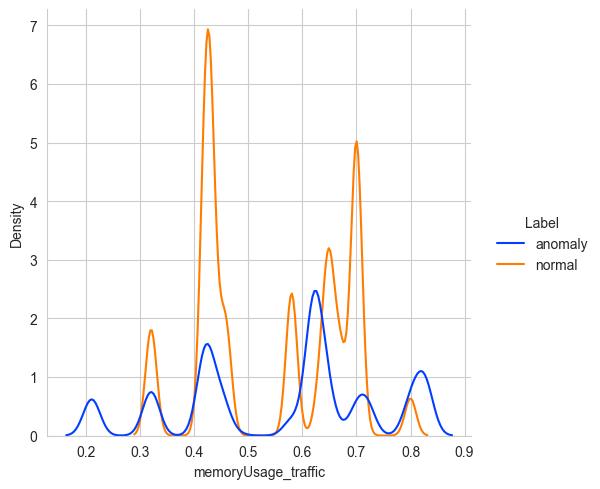

In [5]:
data = pd.concat((data, pd.Series(pred)), axis=1)
data.columns = [*data.columns[:-1], 'Label']
data.Label = data.Label.map({-1: 'anomaly', 1: 'normal'})
plt.figure()
for i in range(10):
    sns.displot(data=data, x=data.columns[i], hue=data.columns[-1], palette='bright', kind='kde')